In [1]:
from pylab import *
from scipy.signal import convolve2d
%matplotlib inline

In [2]:
class Ising(object):
    def __init__(self,T,J,theta):
        self.T=T
        self.N=len(J) # dimension of the problem
        self.spin=2*(rand(self.N,self.N)>0.5)-1 # matrix of spin
        self.J=J
        self.theta=theta
        self.mask=array([[(i+j)%2 for i in arange(0,self.N)] for j in arange (0,self.N)])#this is the chessboard pattern
        #self.E=self.energy2()
        #self.spin=reshape(append(self.spin,self.spin[:,0]),(self.N,self.N+1))
        #self.spin=reshape(append(self.spin,self.spin[0,:]),(self.N+1,self.N+1))
    '''def energy(self):
        E=0
        S=self.spin
        N=self.N
        for i in arange(0,N):
            for j in arange(0,N):
                E+=self.J*(S[i,j]*S[i,(j+1)%N]+S[i,j]*S[i,j-1]+S[i,j]*S[i-1,j]+S[i,j]*S[(i+1)%N,j])
        #self.E=E
        return E'''
    def energy2(self):       
        return -0.5*sum(self.spin*convolve2d(self.spin,self.couplings,"same",boundary="wrap")) #make the matrix product between spin matrix and the coupling matrix
    def energy_difference(self,i,j):# after - before
        S=self.spin
        effective_field=S*self.J
        return 2*effective_field[i,j]*(sum(effective_field)-effective_field[i,j])+2*self.theta*S[i,j]
        #print(i)
        
        
    def move(self):
        i,j=randint(0,self.N,2)
        delta_E= self.energy_difference(i,j)
        if delta_E<0: self.spin[i,j]*=-1
        elif random_sample()<exp(-delta_E/self.T):
             self.spin[i,j]*=-1
        return self.spin
        
        
    def magnetisation(self):
        return mean(self.spin*self.J) #total magnetization
        
    def show(self):
        imshow(self.spin)

Create pattern to be stored

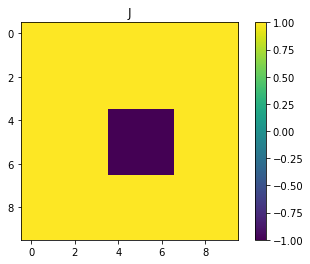

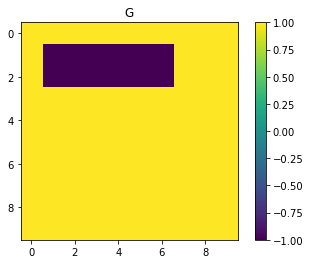

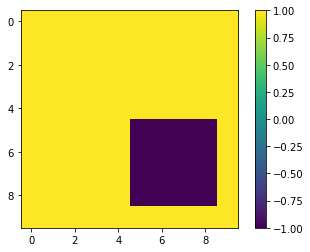

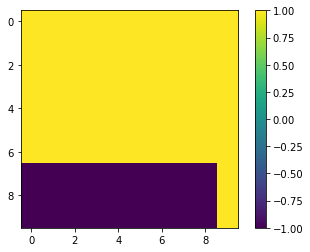

In [3]:
J=zeros((10,10))+1
J[4:7,4:7]=-1
imshow(J)
title("J")
colorbar()
figure()
G=zeros((10,10))+1;
G[1:3,1:7]=-1
title("G")
imshow(G)
colorbar()
figure()
H=zeros((10,10))+1
H[5:9,5:9]=-1;
imshow(H)
colorbar()
figure()
I=zeros((10,10))+1
I[7:10,0:9]=-1;
figure()
imshow(I)
colorbar()

#J=(J+G)/2

$$
       H[\sigma]=-\sum_{j}\sum_{k>j}\sigma_j\sigma_k\xi_j\xi_k-\sum_j\theta_j\sigma_j
$$

$$
     \Delta H=H[F_i\sigma]-H[\sigma]=2\sigma_i \xi_i\sum_{k\neq i}\sigma_k\xi_k+2\theta_i\sigma_i
$$

The pattern of interaction is:
now run the simulation:


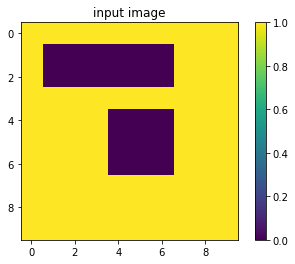

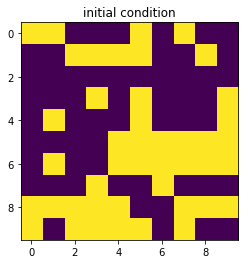

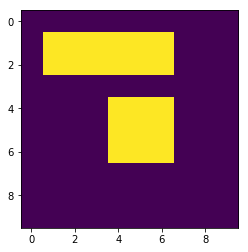

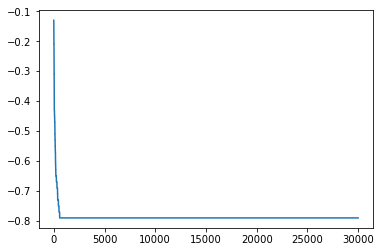

In [10]:
J_temp=(J+G)/2# but it does not work if (J+G)/2
theta=0.2
model = Ising(0.001,J_temp,theta)
print("The pattern of interaction is:")
figure()
title("input image")
imshow(J_temp)
colorbar()
print('now run the simulation:')
figure()
title("initial condition")
model.show()
k=0
dati=[]
while k<30000:
    dati+=[model.magnetisation()]
    model.move()
    k+=1
figure()

model.show()
figure()
plot(dati)

In [59]:
S=2*(rand(10,10)>0.5)-1 # matrix of spin
J*S
i=3;j=4;
print(S)
effective_field=S*J
print(effective_field[i,j]*(sum(effective_field)-effective_field[i,j]))


[[-1 -1  1 -1  1 -1 -1  1  1  1]
 [ 1 -1 -1  1  1 -1  1 -1  1  1]
 [-1 -1 -1  1 -1 -1  1 -1 -1  1]
 [ 1  1 -1 -1 -1  1  1  1 -1  1]
 [-1 -1  1 -1  1 -1  1 -1 -1  1]
 [-1 -1 -1 -1  1  1  1 -1 -1 -1]
 [ 1 -1 -1  1 -1 -1  1 -1  1 -1]
 [-1 -1 -1 -1  1 -1  1  1 -1  1]
 [-1  1 -1 -1  1 -1 -1 -1 -1  1]
 [ 1 -1 -1 -1  1  1 -1 -1  1 -1]]
21.0


In [45]:
import scipy
scipy.special.erf(1/sqrt(2))

0.68268949213708585

In [49]:
(1-0.5*(1-scipy.special.erf(sqrt(100/4)/sqrt(2))))**100

0.99997133524955206